In [1]:
import ipyvuetify as v

In [2]:
# import ipywidgets as widgets
# import numpy as np
# from bqplot import pyplot as plt
# import bqplot

#might change it
%matplotlib inline 

import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import from_levels_and_colors

from matplotlib import animation, rc
from IPython.display import HTML

# TODO clean it up

In [3]:
#Number of grid cells    
n_cells = 100      
    
p_hit = 0.6    
p_miss = 0.2    
p_exact = 0.8    
p_undershoot = 0.1    
p_overshoot = 0.1    

#Start with uniform probability distribution i.e. the robot could be anywhere    
#p = n_cells * [1/n_cells]
p = n_cells * [0]; p[0]=1



In [4]:
# create doors    
# world = [1 if random.random() > 0.8 else 0 for _ in range(n_cells)]
world =  n_cells * [0] 

colors = ["white", "black"]
levels = [0, 1, 2]
# set colors and normalization
cmap, norm = from_levels_and_colors(levels, colors)


In [5]:
def sense(p, Z):    
    q = []    
    for i in range(n_cells):    
        hit = (world[i] == Z)    
        q.append(p[i]*(hit*p_hit + (1 - hit)*p_miss))    
    norm = sum(q)                                                                                    
    q = [q[i]/norm for i in range(n_cells)]                                                          
    return q    


In [6]:
def move(p, U):                                                                                      
    q = []                                                                                           
    for i in range(n_cells):                                                                         
        s = p_exact*p[(i-U)%len(p)]                                                                  
        s += p_overshoot*p[(i-U-1)%len(p)]                                                           
        s += p_undershoot*p[(i-U+1)%len(p)]                                                          
        q.append(s)                                                                                  
    return q    

In [7]:
def init():
    prob_ax.set_xlim(0, n_cells-1)
    prob_ax.set_ylim(0, 1)
    world_ax.set_ylim(-2,3)
    world_ax.set_xlabel("Position")
    prob_ax.set_ylabel("Probability")
    prob_ax.set_title("Histogram Localization With Measurements")
    return rects, line


In [8]:
def update(i):
    global p
    p = sense(p, world[i%100])
    #print(p)
    p = move(p, 1)
    #print(p)
    for rect, h in zip(rects, p):
        rect.set_height(h)
    line.set_xdata((i+1)%n_cells)
    #input()
    return rects, line

(<BarContainer object of 100 artists>,
 <matplotlib.lines.Line2D at 0x7f59f1db4490>)

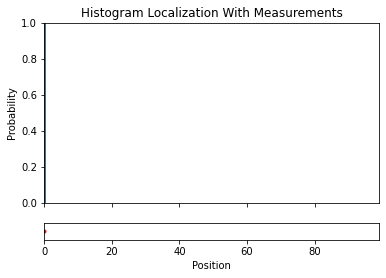

In [9]:
fig, (prob_ax, world_ax) = plt.subplots(
    nrows = 2,
    ncols = 1,
    gridspec_kw = { 'height_ratios': [10,1]},
    sharex=True)
# set world,(x,y) to be the same.
world_ax.imshow([world, world], cmap=cmap, norm=norm, interpolation=None)
# no y axis tick markers
world_ax.get_yaxis().set_ticks([])
x = [i for i in range(n_cells)]
rects = prob_ax.bar(x, p)
# point marker
line, = world_ax.plot(0, 0.5, 'r.')

init()

In [10]:
anim = animation.FuncAnimation(fig, update, frames=n_cells*3, interval=50, init_func=init)


In [11]:
HTML(anim.to_html5_video())

In [12]:
rc('animation', html='html5')
anim